In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import seaborn as sns
import logging

FORMAT = '%(asctime)s %(message)s'

logging.basicConfig(level='INFO', format=FORMAT, datefmt='%d-%b-%y %H:%M:%S')
sns.set_context("talk")

In [3]:
from loren_frank_data_processing import make_epochs_dataframe
from src.parameters import ANIMALS

epoch_info = make_epochs_dataframe(ANIMALS)
epoch_info

environment   type  exposure
animal day epoch                              
Jaq    1   1            sleep  sleep       NaN
           2      lineartrack    run       1.0
           3            sleep  sleep       NaN
           4      lineartrack    run       2.0
           5            sleep  sleep       NaN
           6      lineartrack    run       3.0
           7            sleep  sleep       NaN
       2   1            sleep  sleep       NaN
           2      lineartrack    run       4.0
           3            sleep  sleep       NaN
           4      lineartrack    run       5.0
           5            sleep  sleep       NaN
           6       lineartack    run       1.0
           7            sleep  sleep       NaN
           8      lineartrack    run       6.0
           9            sleep  sleep       NaN
       4   1            sleep  sleep       NaN
           2           wtrack    run       1.0
           3            sleep  sleep       NaN
           4           wtrack    run       2.0
           5            sleep  sleep       NaN
           6           wtrack    run       3.0
           7            sleep  sleep       NaN
Roqui  2   1            sleep  sleep       NaN
           2      lineartrack    run       1.0
           3            sleep  sleep       NaN
           4      lineartrack    run       2.0
           5            sleep  sleep       NaN
           6       lineartack    run       1.0
           7            sleep  sleep       NaN
           8      lineartrack    run       3.0
           9            sleep  sleep       NaN
       5   1            sleep  sleep       NaN
           2           wtrack    run       1.0
           3            sleep  sleep       NaN
           4           wtrack    run       2.0
           5            sleep  sleep       NaN
           6           wtrack    run       3.0
           7            sleep  sleep       NaN
           8           wtrack    run       4.0
           9            sleep  sleep       NaN

In [7]:
from src.load_data import load_data

epoch_key = ('Jaq', 1, 2) # animal, day, epoch

data = load_data(epoch_key)

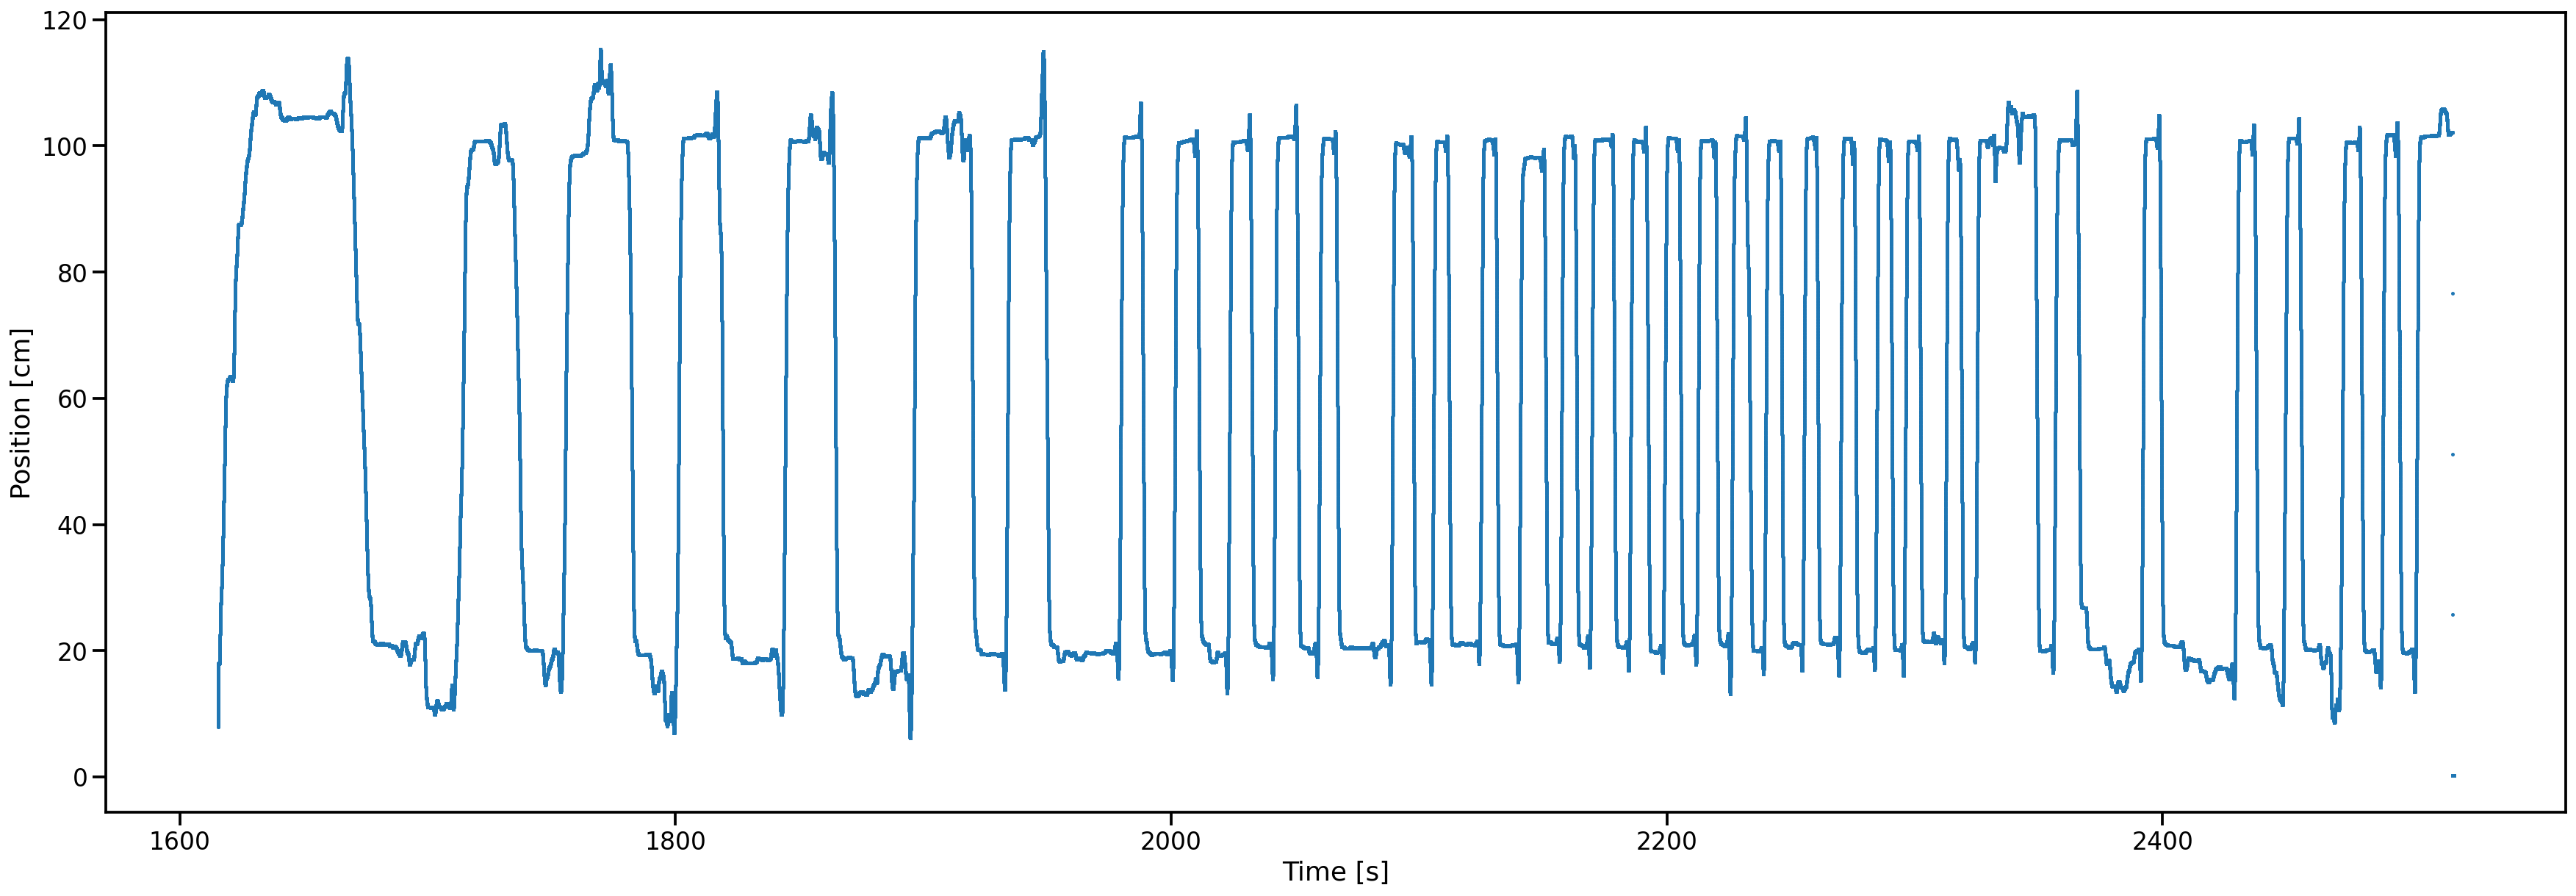

In [8]:
fig, ax = plt.subplots(figsize=(30, 10))

for edge_label, df in data['position_info'].groupby('track_segment_id'):
    ax.scatter(df.index / np.timedelta64(1, 's'), df.linear_position, s=1)
    
ax.set_ylabel('Position [cm]')
ax.set_xlabel('Time [s]');

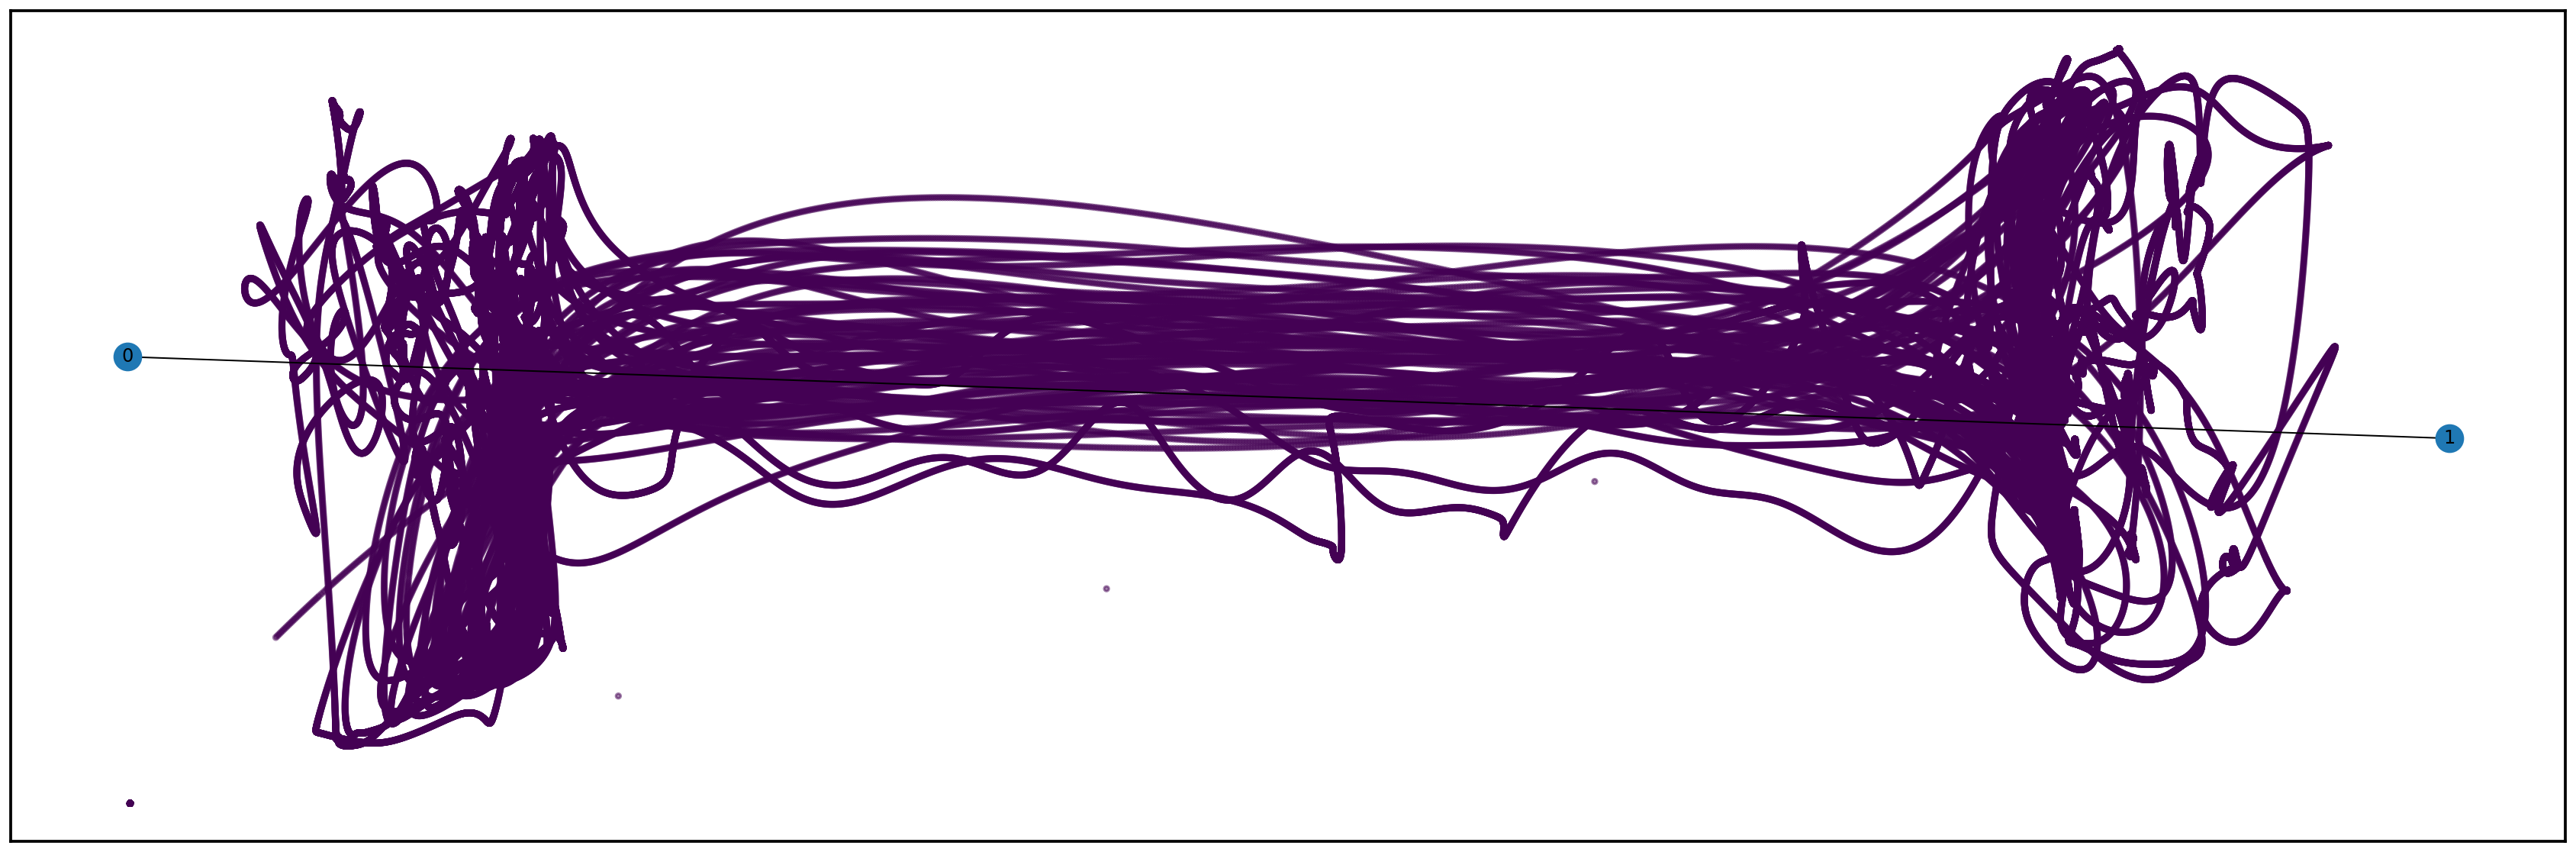

In [15]:
from loren_frank_data_processing.track_segment_classification import plot_track
from src.load_data import make_track_graph

fig, ax = plt.subplots(figsize=(30, 10))

ax.scatter(data['position_info'].tail_x, data['position_info'].tail_y,
           c=data['position_info'].track_segment_id, s=10, zorder=0, alpha=0.5)

track_graph, _ = make_track_graph(epoch_key, ANIMALS)
plot_track(track_graph)